<a href="https://colab.research.google.com/github/Cycyplay/M2_DeepLearning_Classification/blob/main/DeepLearning_Projet_Classification_Version_de_Base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet M2 Deep Learning Classification 
## Version de Base

MURATI Vidan - VAN Cyril

Classification d'oeuvres par leur courant artistique.

## Catégories

- Impressionisme
- Surréalisme
- Cubisme
- Baroque
- Pointillisme / Divisionisme
- Pop Art
- Expressionisme
- Maniérisme
- Néo-classicisme

# Code

### SETUP : Data Initialisation (array formating)

Liste des actions à effectuer:

1. Refaire les échantillons de chaque catégorie
2. Composer les tableaux numpy x_train, y_train, x_test, y_test
3. Les permuter à l'aide de numpy.random.permutation
4. Sauvegarder les 4 tableaux mélangés deux à deux
5. Mettre x_train et x_test au bon format ?

#### Transform data to float32

In [ ]:
x_test = np.load('./drive/MyDrive/DeepLearning_Dataset/x_test.npy')
x_train = np.load('./drive/MyDrive/DeepLearning_Dataset/x_train.npy')
y_test = np.load('./drive/MyDrive/DeepLearning_Dataset/y_test.npy')
y_train = np.load('./drive/MyDrive/DeepLearning_Dataset/y_train.npy')

In [ ]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(6840, 64, 64, 3)
(6840,)
(1701, 64, 64, 3)
(1701,)


In [ ]:
x_test = np.load('./drive/MyDrive/DeepLearning_Dataset/x_test.npy')
x_test = x_test.astype('float32') / 255.0
np.save('./drive/MyDrive/DeepLearning_Dataset/x_test_float32.npy', x_test)

In [ ]:
x_train = np.load('./drive/MyDrive/DeepLearning_Dataset/x_train.npy')


x_train = x_train.astype('float32') / 255.0
np.save('./drive/MyDrive/DeepLearning_Dataset/x_train_float32.npy', x_train)

#### Shuffle datasets

In [ ]:
x_test = np.load('./drive/MyDrive/DeepLearning_Dataset/x_test_float32.npy')
y_test = np.load('./drive/MyDrive/DeepLearning_Dataset/y_test.npy')

#mélange des datasets
test_permutation = np.random.permutation(len(x_test))

x_test = x_test[test_permutation]
y_test = y_test[test_permutation]

np.save('./drive/MyDrive/DeepLearning_Dataset/x_test_shuffled.npy', x_test)
np.save('./drive/MyDrive/DeepLearning_Dataset/y_test_shuffled.npy', y_test)

In [ ]:
y_train = np.load('./drive/MyDrive/DeepLearning_Dataset/y_train.npy')

train_permutation = np.random.RandomState(seed=42).permutation(len(y_train))

y_train = y_train[train_permutation]

np.save('./drive/MyDrive/DeepLearning_Dataset/y_train_shuffled.npy', y_train)

In [ ]:
x_train = np.load('./drive/MyDrive/DeepLearning_Dataset/x_train_float32.npy')

train_permutation = np.random.RandomState(seed=42).permutation(len(x_train))

x_train = x_train[train_permutation]

np.save('./drive/MyDrive/DeepLearning_Dataset/x_train_shuffled.npy', x_train)

## Load

In [1]:
import keras
import numpy as np

from google.colab import drive
drive.mount('/content/drive')


x_test = np.load('./drive/MyDrive/DeepLearning_Dataset/x_test_shuffled.npy')
x_train = np.load('./drive/MyDrive/DeepLearning_Dataset/x_train_shuffled.npy')
y_test = np.load('./drive/MyDrive/DeepLearning_Dataset/y_test_shuffled.npy')
y_train = np.load('./drive/MyDrive/DeepLearning_Dataset/y_train_shuffled.npy')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Travail sans Data Augmentation

### Modèle 1

In [ ]:
model_1 = keras.Sequential()
model_1.add(keras.layers.Conv2D(32, 3, activation='relu', input_shape=(64, 64, 3), padding='same'))
model_1.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
model_1.add(keras.layers.Flatten())
model_1.add(keras.layers.Dense(128, activation='relu'))
model_1.add(keras.layers.Dense(9, activation='softmax'))
model_1.summary()

model_1.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
history_1 = model_1.fit(x_train, y_train, verbose=1, batch_size=128, epochs=100, validation_data=(x_test, y_test))

In [ ]:
test_loss, test_accuracy = model_1.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test loss: {}".format(test_loss))

54/54 [==============================] - 1s 9ms/step - loss: 5.8448 - accuracy: 0.3568
Test accuracy: 0.35684892535209656
Test loss: 5.844811916351318


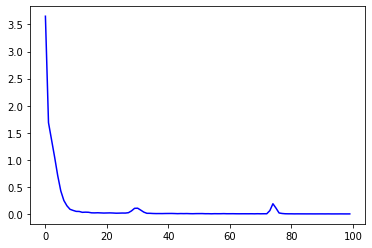

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_1.history["loss"], "b")

### Modèle 2

In [ ]:
model_2 = keras.Sequential()
model_2.add(keras.layers.Conv2D(64, 3, activation='relu', input_shape=(64, 64, 3), padding='same'))
model_2.add(keras.layers.Flatten())
model_2.add(keras.layers.Dense(128, activation='relu'))
model_2.add(keras.layers.Dense(9, activation='softmax'))
model_2.summary()

model_2.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
history_2 = model_2.fit(x_train, y_train, verbose=1, batch_size=128, epochs=100, validation_data=(x_test, y_test))

In [ ]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test loss: {}".format(test_loss))

54/54 [==============================] - 0s 5ms/step - loss: 5.5380 - accuracy: 0.3780
Test accuracy: 0.37801292538642883
Test loss: 5.537961959838867


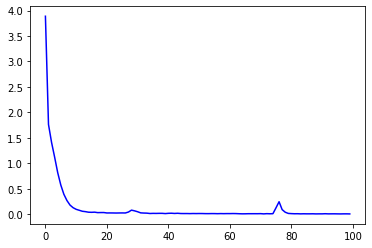

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_2.history["loss"], "b")

### Modèle 3

In [ ]:
model_3 = keras.Sequential()
model_3.add(keras.layers.Conv2D(32, 3, activation='relu', input_shape=(64, 64, 3), padding='same'))
model_3.add(keras.layers.Flatten())
model_3.add(keras.layers.Dense(64, activation='relu'))
model_3.add(keras.layers.Dense(9, activation='softmax'))
model_3.summary()

model_3.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
history_3 = model_3.fit(x_train, y_train, verbose=1, batch_size=128, epochs=60, validation_data=(x_test, y_test))

In [ ]:
test_loss, test_accuracy = model_3.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test loss: {}".format(test_loss))

54/54 [==============================] - 0s 5ms/step - loss: 4.2987 - accuracy: 0.3445
Test accuracy: 0.3445032238960266
Test loss: 4.298705101013184


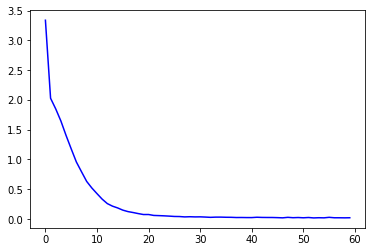

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_3.history["loss"], "b")

## Travail avec Data Augmentation

In [2]:
#Data Augmentation

data_augmentation = keras.Sequential(
    [
      keras.layers.RandomFlip("horizontal"),
      keras.layers.RandomRotation(0.1),
      keras.layers.RandomZoom(0.2)
    ]
)

inputs = keras.Input(shape=(64, 64, 3))

### Modèle 4

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 sequential (Sequential)     (None, 64, 64, 3)         0         
                                                                 
 rescaling_1 (Rescaling)     (None, 64, 64, 3)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        18496     
                                                           

214/214 [==============================] - 46s 159ms/step - loss: 2.1977 - accuracy: 0.1117 - val_loss: 2.1961 - val_accuracy: 0.1505
Epoch 2/100
214/214 [==============================] - 37s 174ms/step - loss: 2.1857 - accuracy: 0.1414 - val_loss: 2.1558 - val_accuracy: 0.1993
Epoch 3/100
214/214 [==============================] - 27s 128ms/step - loss: 2.1314 - accuracy: 0.1999 - val_loss: 2.1136 - val_accuracy: 0.1958
Epoch 4/100
214/214 [==============================] - 28s 132ms/step - loss: 2.0980 - accuracy: 0.2228 - val_loss: 2.0870 - val_accuracy: 0.2252
Epoch 5/100
214/214 [==============================] - 28s 131ms/step - loss: 2.0690 - accuracy: 0.2371 - val_loss: 2.0625 - val_accuracy: 0.2375
Epoch 6/100
214/214 [==============================] - 28s 129ms/step - loss: 2.0358 - accuracy: 0.2501 - val_loss: 2.0397 - val_accuracy: 0.2569
Epoch 7/100
214/214 [==============================] - 27s 126ms/step - loss: 2.0139 - accuracy: 0.2573 - val_loss: 2.0530 - val_accurac

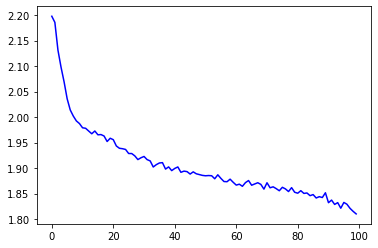

In [5]:
x = data_augmentation(inputs)
x = keras.layers.Rescaling(1./255)(x)
x = keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(9, activation="sigmoid")(x)
model_4 = keras.Model(inputs=inputs, outputs=outputs)

model_4.summary()

model_4.compile(optimizer='rmsprop', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

callbacks = [
  keras.callbacks.ModelCheckpoint(
  filepath="convnet_from_scratch_with_augmentation.keras",
  save_best_only=True,
  monitor="val_loss")
]

history_4 = model_4.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

test_loss, test_accuracy = model_4.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test loss: {}".format(test_loss))

import matplotlib.pyplot as plt
plt.plot(history_4.history["loss"], "b")

### Modèle 5

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 sequential (Sequential)     (None, 64, 64, 3)         0         
                                                                 
 rescaling_2 (Rescaling)     (None, 64, 64, 3)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 64)        1792      
                                                                 
 flatten_2 (Flatten)         (None, 262144)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               33554560  
                                                                 
 dense_3 (Dense)             (None, 9)                 1161

214/214 [==============================] - 33s 135ms/step - loss: 2.1684 - accuracy: 0.1480 - val_loss: 2.1460 - val_accuracy: 0.1999
Epoch 2/100
214/214 [==============================] - 30s 139ms/step - loss: 2.0910 - accuracy: 0.2120 - val_loss: 2.0667 - val_accuracy: 0.2375
Epoch 3/100
214/214 [==============================] - 29s 134ms/step - loss: 2.0486 - accuracy: 0.2342 - val_loss: 2.0392 - val_accuracy: 0.2475
Epoch 4/100
214/214 [==============================] - 28s 133ms/step - loss: 2.0274 - accuracy: 0.2455 - val_loss: 2.0158 - val_accuracy: 0.2504
Epoch 5/100
214/214 [==============================] - 29s 133ms/step - loss: 2.0069 - accuracy: 0.2550 - val_loss: 2.0007 - val_accuracy: 0.2610
Epoch 6/100
214/214 [==============================] - 29s 134ms/step - loss: 1.9920 - accuracy: 0.2573 - val_loss: 1.9900 - val_accuracy: 0.2593
Epoch 7/100
214/214 [==============================] - 28s 133ms/step - loss: 1.9821 - accuracy: 0.2610 - val_loss: 1.9912 - val_accurac

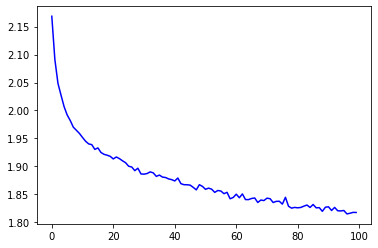

In [6]:
x = data_augmentation(inputs)
x = keras.layers.Rescaling(1./255)(x)
x = keras.layers.Conv2D(64, 3, activation='relu', input_shape=(64, 64, 3), padding='same')(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(128, activation='relu')(x)
outputs = keras.layers.Dense(9, activation='softmax')(x)
model_5 = keras.Model(inputs=inputs, outputs=outputs)

model_5.summary()

model_5.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

callbacks = [
  keras.callbacks.ModelCheckpoint(
  filepath="convnet_from_scratch_with_augmentation.keras",
  save_best_only=True,
  monitor="val_loss")
]

history_5 = model_5.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

test_loss, test_accuracy = model_5.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test loss: {}".format(test_loss))

import matplotlib.pyplot as plt
plt.plot(history_5.history["loss"], "b")

### Modèle 6

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 sequential (Sequential)     (None, 64, 64, 3)         0         
                                                                 
 rescaling_2 (Rescaling)     (None, 64, 64, 3)         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 29, 29, 64)        18496     
                                                           

214/214 [==============================] - 33s 141ms/step - loss: 2.1975 - accuracy: 0.1139 - val_loss: 2.1930 - val_accuracy: 0.1152
Epoch 2/100
214/214 [==============================] - 27s 126ms/step - loss: 2.1565 - accuracy: 0.1813 - val_loss: 2.1201 - val_accuracy: 0.2040
Epoch 3/100
214/214 [==============================] - 32s 149ms/step - loss: 2.1004 - accuracy: 0.2133 - val_loss: 2.0883 - val_accuracy: 0.2269
Epoch 4/100
214/214 [==============================] - 30s 140ms/step - loss: 2.0575 - accuracy: 0.2395 - val_loss: 2.0526 - val_accuracy: 0.2334
Epoch 5/100
214/214 [==============================] - 29s 134ms/step - loss: 2.0249 - accuracy: 0.2499 - val_loss: 2.0315 - val_accuracy: 0.2487
Epoch 6/100
214/214 [==============================] - 27s 127ms/step - loss: 2.0083 - accuracy: 0.2534 - val_loss: 2.0155 - val_accuracy: 0.2522
Epoch 7/100
214/214 [==============================] - 28s 131ms/step - loss: 1.9969 - accuracy: 0.2604 - val_loss: 2.0060 - val_accurac

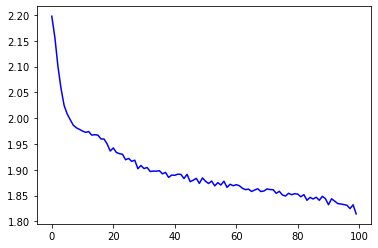

In [5]:
x = data_augmentation(inputs)
x = keras.layers.Rescaling(1./255)(x)
x = keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(9, activation="sigmoid")(x)
model_6 = keras.Model(inputs=inputs, outputs=outputs)


model_6.summary()

model_6.compile(optimizer='rmsprop', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

callbacks = [
  keras.callbacks.ModelCheckpoint(
  filepath="convnet_from_scratch_with_augmentation.keras",
  save_best_only=True,
  monitor="val_loss")
]

history_6 = model_6.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

test_loss, test_accuracy = model_6.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test loss: {}".format(test_loss))

import matplotlib.pyplot as plt
plt.plot(history_6.history["loss"], "b")